In [1]:
import matplotlib.pyplot as plt
import pandas, numpy

In [2]:
# WORKS FINE FOR SCENARIO: MAINTAIN CURRENT LUMINOSITY

# NOTE: SET NUMBER OF MODES AS NUM_MODES
# SET NUMBER OF RUNS PER MODE AS RUNS_PER_MODE
# TRIAL AND ERROR THE STARTING INDEX

NUM_MODES = 1
RUNS_PER_MODE = 5
START_ROW = 23

df = pandas.read_csv("Daisyworld_experiment-surface-albedo-spreadsheet.csv", header=START_ROW)
df = df.drop("[all run data]", axis=1)
df.index.name = "Tick"
ticks = range(0,3001)
df.head()

,num-blacks,num-whites,global-temperature,num-blacks.1,num-whites.1,global-temperature.1,num-blacks.2,num-whites.2,global-temperature.2,num-blacks.3,num-whites.3,global-temperature.3,num-blacks.4,num-whites.4,global-temperature.4
Tick,,,,,,,,,,,,,,,
0,168,168,8.885953,168,168,8.885953,168,168,8.885953,168,168,8.885953,168,168,8.885953
1,317,164,13.328930,305,158,13.328930,317,159,13.328930,303,159,13.328930,320,160,13.328930
2,540,159,17.123556,510,150,17.233786,514,158,17.310934,531,151,17.177207,540,149,17.302114
3,667,155,21.338326,663,147,21.444163,648,150,21.221140,672,145,21.578988,669,140,21.802360
4,689,152,24.808707,696,142,25.123222,686,146,24.756005,695,142,25.351552,698,139,25.621960


In [3]:
# Initialise and group index columns by runs 
BLACK = "num-blacks"
WHITE = "num-whites"
TEMPERATURE = "global-temperature"
blacks_index = [BLACK]
whites_index = [WHITE]
temper_index = [TEMPERATURE]

# Each element of meanvar represents results from 1 mode.
# Each element is [<MEAN>, <VAR>]
black_meanvar = []
white_meanvar = []
temp_meanvar = []

# Group index columns in same run
for i in range(1,NUM_MODES*RUNS_PER_MODE):
    blacks_index.append(BLACK+'.'+str(i))
    whites_index.append(WHITE+'.'+str(i))
    temper_index.append(TEMPERATURE+'.'+str(i))

# Split index columns by runs
blacks = numpy.array_split(blacks_index, NUM_MODES)
whites = numpy.array_split(whites_index, NUM_MODES)
temps = numpy.array_split(temper_index, NUM_MODES)

# Calculate mean and variance across each run for each tick
for i in range(0,NUM_MODES):
    # mean
    avgb = df[blacks[i]].mean(axis=1)
    avgw = df[whites[i]].mean(axis=1)
    avgt = df[temps[i]].mean(axis=1)
    
    # variance
    varb = df[blacks[i]].var(axis=1)
    varw = df[blacks[i]].var(axis=1)
    vart = df[blacks[i]].var(axis=1)
    
    black_meanvar.append([avgb, varb])
    white_meanvar.append([avgw, varw])
    temp_meanvar.append([avgt, vart])
    

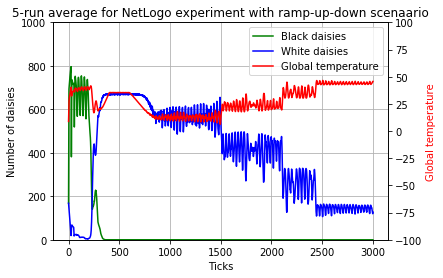

In [4]:
# Plot line graph

# NOTE: MODIFY PARAMS HERE TO PRODUCE AND SAVE THE REQUIRED GRAPHS
# EXP_NAME : NAME OF CURRENT EXPERIMENT
# MODE [0,NUM_MODES] : 0 MEANS RUN FOR LOW PARAM, 1 MEANS MEDIUM PARAM, ETC..
# VARIABLE : MORE DETAIL OF VARYING PARAM, FOR BETTER GRAPH TITLE.
EXP_NAME = "ramp-up-down"
MODE = 0
VARIABLE = "ramp-up-down scenaario"


# create figure and axis objects with subplots()
fig,ax=plt.subplots()
l1 = ax.plot(ticks, black_meanvar[MODE][0], "-g", label="Black daisies")
ax.set_xlabel("Ticks")
ax.set_ylabel("Number of daisies")
ax.set_ylim(0,1000)
l2 = ax.plot(ticks, white_meanvar[MODE][0], "-b", label="White daisies")

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
l3 = ax2.plot(ticks, temp_meanvar[MODE][0], "-r", label="Global temperature")
ax2.set_ylabel("Global temperature",color="red")
ax2.set_ylim(-100,100)

# Set legends
lines = l1 + l2 + l3
labs = [l.get_label() for l in lines]
ax.legend(lines, labs, loc=0)

# Config
ax.grid()
plt.title("5-run average for NetLogo experiment with " + VARIABLE)

plt.show()

# save the plot as a file
fig.savefig('experiment-'+EXP_NAME+'-mode-'+str(MODE)+'.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')